In [1]:
# IMPORTING LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
# type of model where you can add layers sequentially (chain)
# used to create simple models, each layer takes the output of the previous one and feeds it to the next
from keras.layers import Dense
# represents a fully connected neural network layer, uses a weight matrix that connects each input to all outputs

In [2]:
# READING DATA
# read white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
# read red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [3]:
red.head() # first rows of red wine data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white.tail() # last rows of white wine data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
red.sample(5) # take a sample of five rows of red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1055,8.2,0.640,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,6
491,9.2,0.410,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
318,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,7


In [6]:
white.describe() # describe white wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
pd.isnull(red) # double check for null values in red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


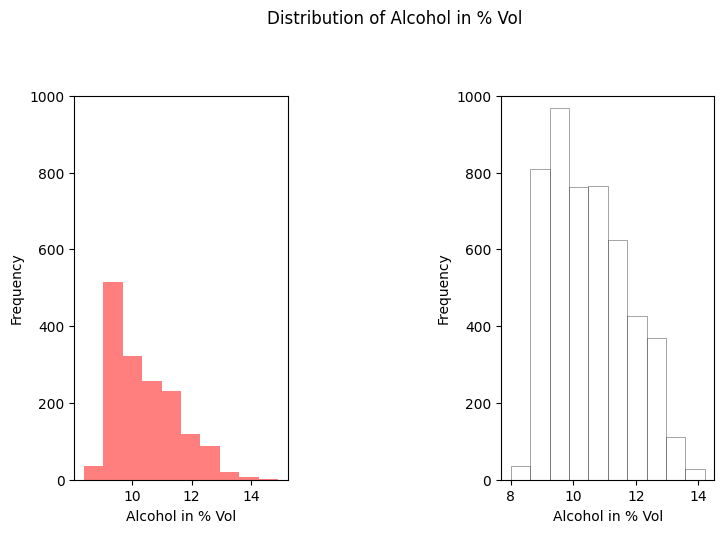

In [8]:
# CREATING HISTOGRAM
# comparing distribution of alcohol content between red and white wines
fig,ax = plt.subplots(1,2) # creates a figure with two subplots arranged in one row and two columns

ax[0].hist(red.alcohol,10,facecolor = 'red', alpha = 0.5, label = "Red wine")
# 10 specifies number of bins, facecolor = red sets the color of bars
# alpha = 0.5 sets transparency of bars, label = "Red Wine" adds a label to legend

ax[1].hist(white.alcohol,10,facecolor = 'white', ec = "black", lw = 0.5, alpha = 0.5, label = "White wine")
# ec = 'black' adds black edge color the bars, lw = 0.5 sets edge width

fig.subplots_adjust(left = 0, right = 1,bottom = 0, top = 0.8, hspace = 0.05, wspace = 1)

# sets y-axis limits for both subplots
# adds x and y axis labels to both subplots
ax[0].set_ylim([0,1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0,1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [9]:
# ADDING COLUMNS AND SPLITTING DATA
red['type'] = 1 # adds column, name is type and equal to 1
white['type'] = 0 # adds column, name is type and equal to 0

wines = pd.concat([red, white], ignore_index=True)
# red and white data frames are merged into a single data frame (wines)
# ignore_index=True: causes the indexes to be reordered

X = wines.iloc[:, 0:11] # contains first 11 columns representing the wine characteristics
y = np.ravel(wines.type) # contains type column representing the type of wine (red or white) and this data is converted to numpy array format

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.34,random_state=45) # split data

In [23]:
model = Sequential() # build model
model.add(Dense(12,activation = 'relu', input_shape=(11,))) # fully connected layer with 12 neurons, number of features : 11
model.add(Dense(9,activation = 'relu')) # fully connected layer with 9 neurons
model.add(Dense(1,activation = 'sigmoid')) # output layer with 1 neuron
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# loss: defines how the model's error is calculated and optimized this is for binary classification
# optimizer: algorithm for updating model's weights to minimize loss
# metrics: measures used to evaluate model's performance

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train, y_train, epochs = 3, batch_size = 1, verbose = 1) # train model
y_pred = model.predict(X_test) # prediction
print(y_pred)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8454 - loss: 1.2800
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9380 - loss: 0.1993
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9400 - loss: 0.1794
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1.0714001e-03]
 [2.1477742e-03]
 [5.7314748e-05]
 ...
 [7.4875029e-04]
 [4.1162642e-04]
 [2.8208569e-07]]
